### Importing libraries

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
import os
os.environ['PYTHONHASHSEED'] = str(0) 
np.random.seed(1)

### Data Extraction

In [2]:
network_data = pd.read_csv("kddcup") #the file is located in the same folder 
network_data.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


As we notice, the features (columns) have no names, so we need to rename them. A list of features is provided [here](https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data?select=kddcup.names)

In [3]:
network_data.columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment",
           "urgent", "hot", "num_failed_logins", "loggedin", "num_compromised", "root_shell", "su_attempted",
           "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
           "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
           "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
           "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "class"]
network_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


## Data Exploration and  Visualization





In [4]:
network_data.shape

(494020, 42)

The data set contains 494020 observations and 41 features (excluding the class label column)

In [5]:
network_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  loggedin                     494020 non-null  int64  
 12  num_compromised              494020 non-null  int64  
 13 

All columns have **no missing values**

Text(0.5, 1.0, 'The protocol type distribution')

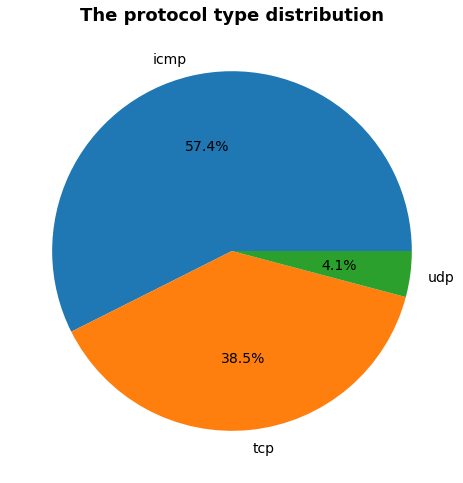

In [6]:
#let us see the protocol type distribution  
plt.figure(figsize=(11.7,8.27))
service_group = network_data.groupby("protocol_type")["protocol_type"].count()
plt.pie(service_group.values, autopct='%1.1f%%',labels=service_group.index,textprops={'fontsize': 14})
plt.title("The protocol type distribution",fontsize = 18, weight = 'bold')

The majority of the connections used the **ICMP** protocol, and the minority used **UDP** protocol

In [7]:
network_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,loggedin,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# What if we find the max of a numarical feature is ZERO ? 
# that means there may be some features with CONSTANT values (no variance)
network_data.max()

duration                              58329
protocol_type                           udp
service                               whois
flag                                     SH
src_bytes                         693375640
dst_bytes                           5155468
land                                      1
wrong_fragment                            3
urgent                                    3
hot                                      30
num_failed_logins                         5
loggedin                                  1
num_compromised                         884
root_shell                                1
su_attempted                              2
num_root                                993
num_file_creations                       28
num_shells                                2
num_access_files                          8
num_outbound_cmds                         0
is_host_login                             0
is_guest_login                            1
count                           

We noticed that  *num_outbound_cmds*  and  *is_host_login*  are seemed to have constant values, but let us plot them to make sure                          

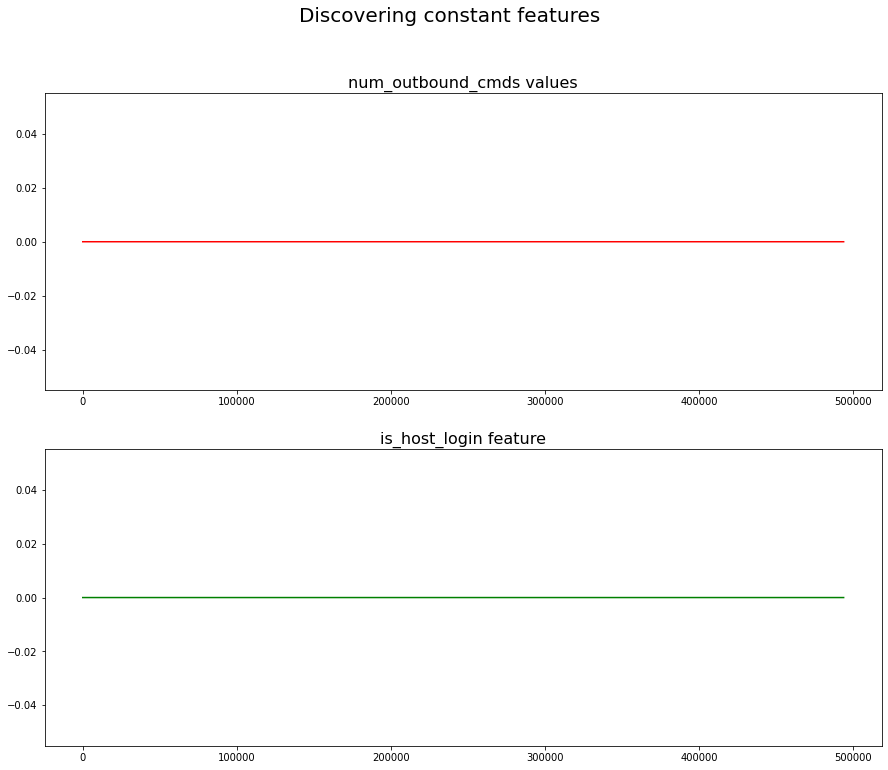

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(10, 4))

fig.set_figwidth(15)
fig.set_figheight(12)

fig.suptitle('Discovering constant features',fontsize = 20)

ax[0].plot(network_data.num_outbound_cmds, c = 'r')
ax[0].set_title('num_outbound_cmds values',fontsize = 16)

ax[1].plot(network_data.is_host_login, c = 'g')
ax[1].set_title('is_host_login feature',fontsize = 16);

As we expected, these two featues have realy **constant zero value**, which indicates that they do not have any importance in our data set

In [10]:
# let us simply drop them 
network_data.drop(['num_outbound_cmds','is_host_login'],axis=1, inplace=True)
network_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


Text(0.5, 1.0, 'The class label distribution')

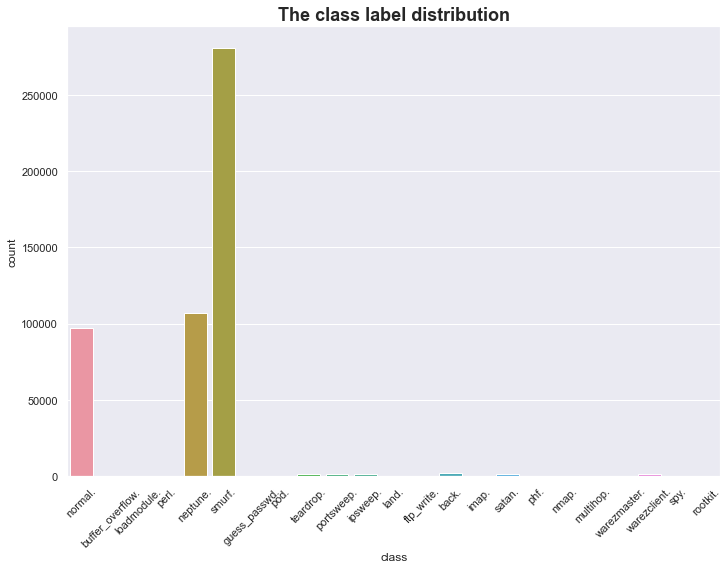

In [11]:
#let us see the class distribution  
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=45)
sns.countplot(x="class", data=network_data)
plt.title("The class label distribution",fontsize = 18, weight = 'bold')

Let us discover the **class** label colunms' possible values, since we could not clearly find them from the above figure

In [12]:
unique_class = network_data['class'].unique()
unique_class

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [13]:
len(unique_class)

23

We have **23 classes**, 22 of them are considered as different attacks' types and 1 class represents the **"normal"** connection (legitimate connection). This data set can be used for both multi-class and binary classification, however, if we consider our problem as a binary classification problem, we have to restrict our class labels to be only 2 classes. One suggestion is to make our classifier more general by giving it the ability to only detect the presence of attacks without deeply specifying their types, so we will re-format the class label column by replacing and attack type with **"attack"** label   

## Data Preprocessing 

### Formatting the class label column 

In [14]:
def prepare_label(network_data):
    '''
    INPUT:
    network_data - (pandas dataframe) dataframe that has column 'class' with multi-class labels
    
    OUTPUT:
    network_data - (pandas dataframe) dataframe after reformatting the 'class' column to bunary-class labels (normal or attack)
    
    '''
    #removing dots from the class labels
    network_data['class'] = network_data['class'].apply(lambda x: x.replace(".", ""))
    #replacing and attack type (any class that is NOT "normal) with "attack" label
    network_data['class'] = network_data['class'].apply(lambda x: x if x == "normal" else "attack")
    return network_data

In [15]:
network_data = prepare_label(network_data)
network_data['class'].unique()

array(['normal', 'attack'], dtype=object)

Text(0.5, 1.0, 'The class label distribution')

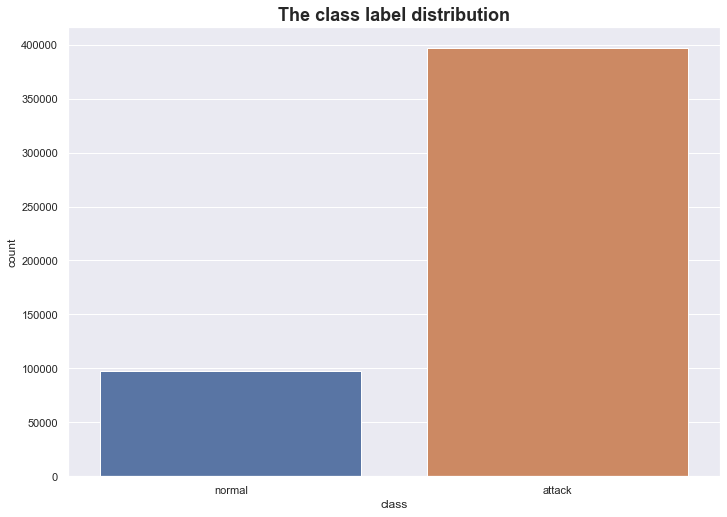

In [16]:
#let us check the class distribution after our modification  
sns.countplot(x="class", data=network_data)
plt.title("The class label distribution",fontsize = 18, weight = 'bold')

The figure above illustrates that the number of **"normal"** connections samples is approximately 25% of the number of **"attack"** connections samples, that was expectect since we merge different attacks to be one general class. It is clear that we may be affected by the **class imbalance** issue with our data set, so we need to take this into consideration as we progress in the project 

### Categorical Features One Hot Encoding


As we are planning to build multiple classification models for this task, some of the models can not work with categorical features (such as decision trees), so we need to make some features encoding

In [17]:
#let us see what are the features that have other than numerical values
network_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  loggedin                     494020 non-null  int64  
 12  num_compromised              494020 non-null  int64  
 13 

As we noticed we have 3 features that need to be encoded. These are "protocol_type","service", and "flag", they are of type string object.
Let us have a look to their possible values, to decide wether **one-hot encoding** is a good way.

In [18]:
set(network_data.protocol_type)

{'icmp', 'tcp', 'udp'}

In [19]:
pd.unique(network_data.service)

array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
       'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
       'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh',
       'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf',
       'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer',
       'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard',
       'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2',
       'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm',
       'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i',
       'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i'],
      dtype=object)

In [20]:
len(set(network_data.service))

66

In [21]:
set(network_data.flag)

{'OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH'}

From the above quick exploration, it seems that the **one-hot encoding** can be used for "protocol_type" and "flag" since the number of their possible categories is relatively small.On the other hand, the "service" feature has huge number of categories which will affect the dimensionality negatively if one-hot encoding is used!

We will try **Label Encoding** for the "service" feature

In [22]:
#perform one-hot encoding on (protocol-type) and (flag)
encoded_protocol_type = pd.get_dummies(network_data["protocol_type"], prefix="protocol_type_")
encoded_flag = pd.get_dummies(network_data["flag"], prefix="flag_")
#Drop the old feature (before the encoding)
network_data.drop("protocol_type", axis=1, inplace=True)
network_data.drop("flag", axis=1, inplace=True)
encoded_protocol_type

,protocol_type__icmp,protocol_type__tcp,protocol_type__udp
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
494015,0,1,0
494016,0,1,0
494017,0,1,0
494018,0,1,0


In [23]:
# perform label encoding on (service)
encoder = LabelEncoder()
encoded_service = encoder.fit_transform(network_data.service)
encoded_service_df = pd.DataFrame(encoded_service)
encoded_service_df.set_axis(['service'], axis=1,inplace=True)
pd.unique(encoded_service_df['service'])

array([22, 50, 17, 11,  3, 56, 18, 13, 39, 14, 40, 45, 43, 19, 48, 59, 31,
       29, 47, 20, 52, 32, 65, 10, 30, 24,  8,  7, 38, 49,  0, 37, 23, 16,
       44, 15,  5, 62, 26, 27, 12,  9, 55, 54, 25, 21,  6, 42, 53, 63, 34,
       35, 33, 51, 64,  4,  2, 28, 36, 60,  1, 61, 41, 57, 58, 46])

In [24]:
#Drop the old feature (before the encoding)
network_data.drop("service", axis=1, inplace=True)


As we notice, label encoder gives each category in the "service" column a numerical value 

### Splitting the data to X, Y

In [25]:
X,y = network_data.drop('class',axis=1), network_data['class']
X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,loggedin,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,239,486,0,0,0,0,0,1,0,...,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
1,0,235,1337,0,0,0,0,0,1,0,...,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
2,0,219,1337,0,0,0,0,0,1,0,...,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0,217,2032,0,0,0,0,0,1,0,...,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
4,0,217,2032,0,0,0,0,0,1,0,...,59,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,310,1881,0,0,0,0,0,1,0,...,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494016,0,282,2286,0,0,0,0,0,1,0,...,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494017,0,203,1200,0,0,0,0,0,1,0,...,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494018,0,291,1200,0,0,0,0,0,1,0,...,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


In [26]:
#Concatenate the newly encoded columns with our data frame
X = pd.concat([X, encoded_protocol_type, encoded_service_df['service'], encoded_flag], axis=1)
X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,loggedin,num_compromised,...,flag__REJ,flag__RSTO,flag__RSTOS0,flag__RSTR,flag__S0,flag__S1,flag__S2,flag__S3,flag__SF,flag__SH
0,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,310,1881,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
494016,0,282,2286,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
494017,0,203,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
494018,0,291,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Target encoding

In [27]:
#using the same label encoding technique on the target column
y = encoder.fit_transform(y)
pd.unique(y)


array([1, 0])

In [28]:
# get the mapping between the original labels and encoded labels
mapping = {l: i for i, l in enumerate(encoder.classes_)}
mapping

{'attack': 0, 'normal': 1}

### Splitting the data to TRAIN and TEST data sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

## Building classification models

#### 1- Logistic Regression

In [30]:
log_reg_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg_model.fit(X_train,y_train)
pred_log_reg = log_reg_model.predict(X_test)

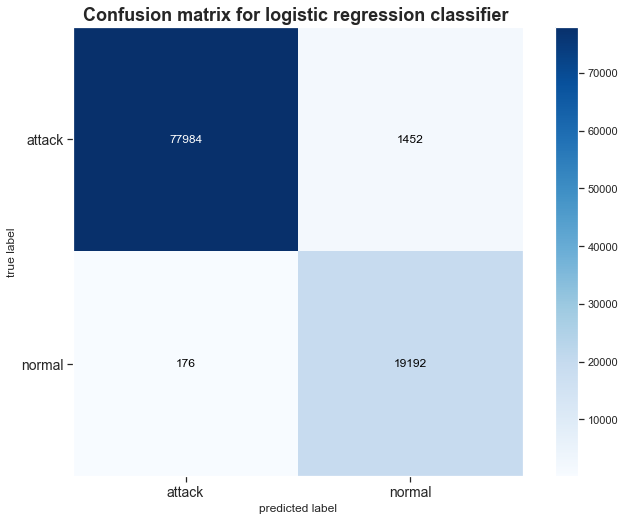

In [31]:
#Plotting the confusion matrix 
cm_log_reg = confusion_matrix(y_true=y_test, y_pred=pred_log_reg)
fig, ax = plot_confusion_matrix(conf_mat=cm_log_reg,colorbar=True,class_names=['attack', 'normal'])
plt.title("Confusion matrix for logistic regression classifier ",fontsize = 18, weight = 'bold')
plt.xticks(rotation=0,fontsize = 14)
plt.yticks(rotation=0,fontsize = 14)
plt.show()

#### 2- Decision Tree

In [32]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
pred_DT =DT.predict(X_test)


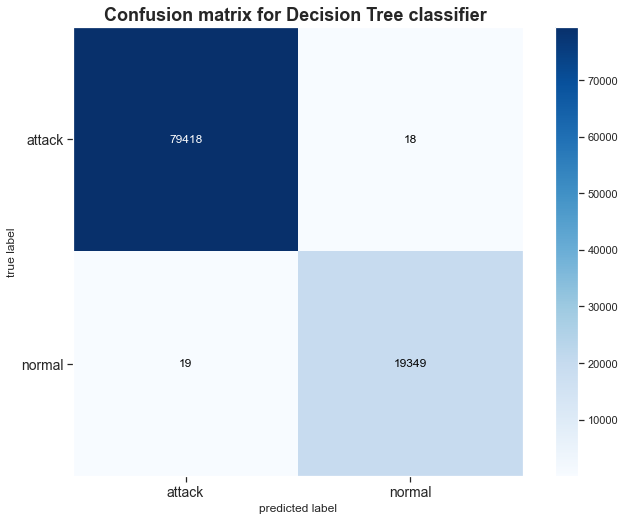

In [33]:
#Plotting the confusion matrix 
cm_DT = confusion_matrix(y_true=y_test, y_pred=pred_DT)
fig, ax = plot_confusion_matrix(conf_mat=cm_DT,colorbar=True,class_names=['attack', 'normal'])
plt.title("Confusion matrix for Decision Tree classifier ",fontsize = 18, weight = 'bold')
plt.xticks(rotation=0,fontsize = 14)
plt.yticks(rotation=0,fontsize = 14)
plt.show()

#### 3- Neural network

In [34]:
def build_neural_network(input_size):
    '''
    INPUT:
    input_size - number of input features 
    
    OUTPUT:
    nn_model -  neural network binary classification model
    
    '''
    print('Build model...')
    nn_model = Sequential()
    nn_model.add(Dense(60, input_dim = input_size, activation='relu'))
    nn_model.add(Dropout(0.05))
    nn_model.add(Dense(30, activation='relu'))
    nn_model.add(Dense(1, activation='sigmoid'))
    nn_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return nn_model

In [35]:
nn_model = build_neural_network(X_train.shape[1])

Build model...


In [36]:
# Prepare validation set (subset 25% of the previous training set) that is used to evaluate the model every epoch
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train...')
nn_model.fit(X_train2, y_train2, epochs=20,
               validation_data=(X_val, y_val))
score, acc = nn_model.evaluate(X_test, y_test)


Train...
Epoch 1/20
9263/9263 [==============================] - 8s 783us/step - loss: 38.7073 - accuracy: 0.9815 - val_loss: 9.5707 - val_accuracy: 0.9945
Epoch 2/20
9263/9263 [==============================] - 7s 783us/step - loss: 70.8355 - accuracy: 0.9896 - val_loss: 29.9827 - val_accuracy: 0.9927
Epoch 3/20
9263/9263 [==============================] - 7s 743us/step - loss: 17.7220 - accuracy: 0.9920 - val_loss: 2.3732 - val_accuracy: 0.9949
Epoch 4/20
9263/9263 [==============================] - 7s 745us/step - loss: 4.8106 - accuracy: 0.9940 - val_loss: 1.5893 - val_accuracy: 0.9971
Epoch 5/20
9263/9263 [==============================] - 7s 741us/step - loss: 0.2676 - accuracy: 0.9945 - val_loss: 0.0186 - val_accuracy: 0.9937
Epoch 6/20
9263/9263 [==============================] - 7s 764us/step - loss: 0.0489 - accuracy: 0.9937 - val_loss: 1.1623 - val_accuracy: 0.9934
Epoch 7/20
9263/9263 [==============================] - 7s 748us/step - loss: 0.0293 - accuracy: 0.9951 - val_l

In [37]:
def predict_class(model, X_test):
    '''
    INPUT:
    model - neural network traffic network classifier
    X_test - (Numpy array) test set features as input for the model 
    
    OUTPUT:
    pred_nn - (Numpy array) predictions after converting the model's output to 'attack': 0, 'normal': 1
    
    
    '''
    # if the output probability > 0.5 then the class is 'normal' otherwise 'attack'
    pred_func = lambda x: model.predict(x) > .5 
    pred_nn = pred_func(X_test).astype(int)
    return pred_nn

In [38]:
pred_nn = predict_class(nn_model, X_test)

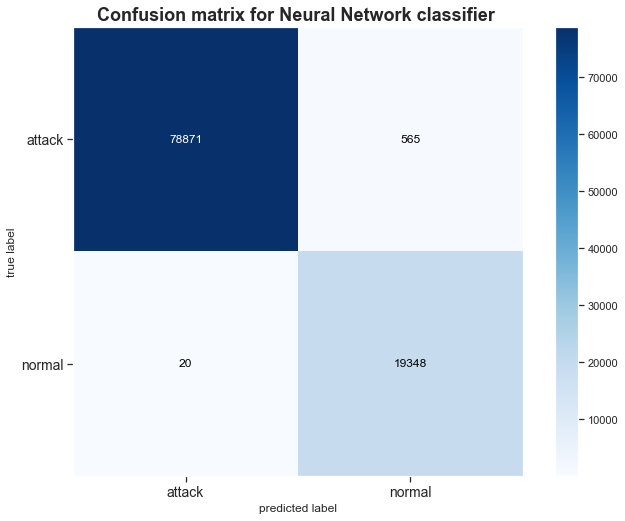

In [39]:
#Plotting the confusion matrix 
cm_nn = confusion_matrix(y_true=y_test, y_pred=pred_nn)
fig, ax = plot_confusion_matrix(conf_mat=cm_nn,colorbar=True, class_names=['attack', 'normal'])
plt.title("Confusion matrix for Neural Network classifier ",fontsize = 18, weight = 'bold')
plt.xticks(rotation=0,fontsize = 14)
plt.yticks(rotation=0,fontsize = 14)
plt.show()

## Model Selection

In [40]:
def classification_matrix(pred,y_test):
    '''
    INPUT:
    pred - (Numpy array) predictions array
    y_test - (Numpy array) ground truth test labels 
    
    OUTPUT:
    cm_results - (list) list of classification metrics (accuracy,precision,recall,f1_score)
    
    '''
    cm_results = [accuracy_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred), f1_score(y_test,pred)]
    return cm_results

In [41]:
# Compile all of the error metrics into a dataframe for comparison
cm_log_ = classification_matrix(pred_log_reg,y_test)
cm_dt_ = classification_matrix(pred_DT,y_test)
cm_nn_ = classification_matrix(pred_nn,y_test)

results = pd.DataFrame(list(zip(cm_log_, cm_dt_,cm_nn_)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['Logistics Regression', 'Decision Tree','Neural Network']
results

,Logistics Regression,Decision Tree,Neural Network
Accuracy,0.983523,0.999626,0.994079
Precision,0.929665,0.999071,0.971627
Recall,0.990913,0.999019,0.998967
F1 Score,0.959312,0.999045,0.985107


As we notice that the **Decision Tree** achieved the highest scores according to all metrics; accuracy, precision, recall, and f1_score metrics. 

What is the most appropriate metric for evaluating an intrusion detection classifier ??

We need to specify the most appropriate evaluation metric for this task. Because of the high cost associated with false negatives (attack connections that were classified as normal), then we can decide that **recall metric** is what should we consider. 

<img src="https://blog.roboflow.com/content/images/2022/03/recall_formula.png"  />

## Dimensionality Reduction 


Although we got **very excellent classification results!** we will try to apply **dimensionality reduction** technique to reduce the number of features. Because our problem is to detect network intrusion, we need to optimize our classifier by making it faster, otherwise,it will not be helpful in real-time usage for the SOC officials.

Moreover, if we came up with a wonderful super accurate classifier that takes some time to predict the presence or absence of network attacks, then these accurate results will not be taken in the consideration as if it is fast!

That is why it is worthy to at least try our best to reduce the high dimensionality that our data suffers from in order to reduce the processing time.

In [42]:
#let us remember how many feature do we have
X.shape[1]

51

### Important features selection using Random Forest

In [43]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X, y)
feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

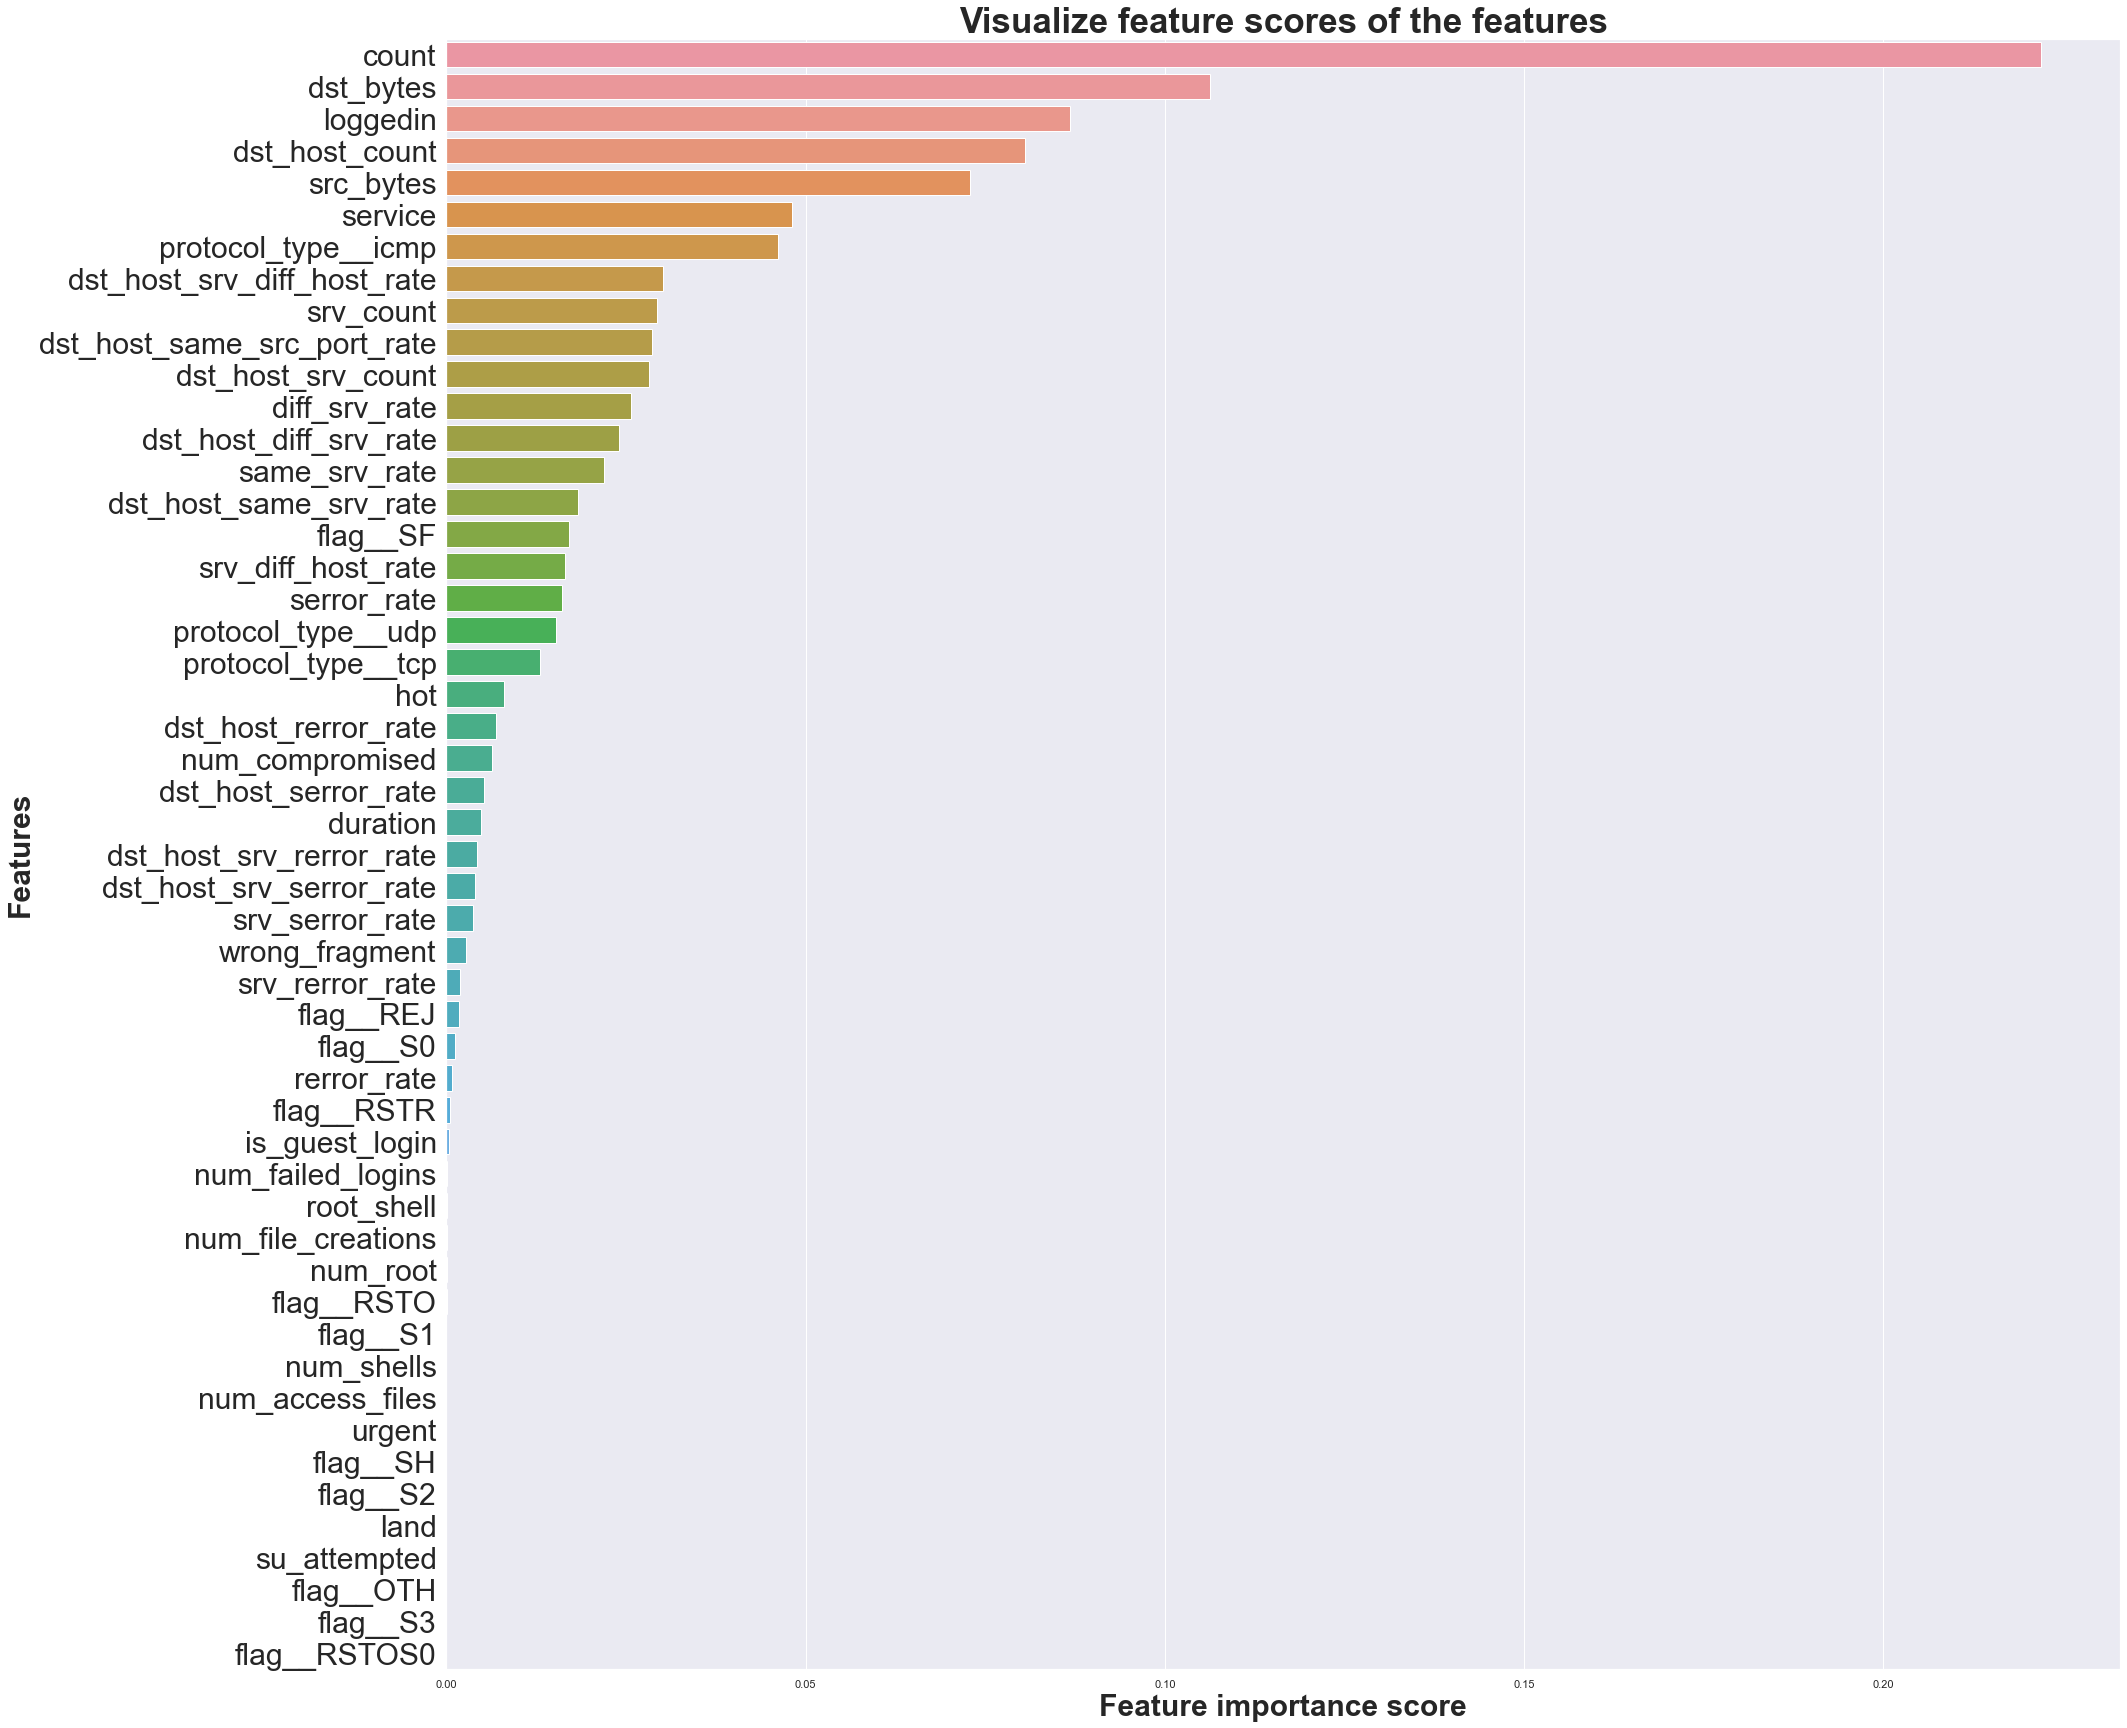

In [44]:
f, ax = plt.subplots(figsize=(30, 30))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=network_data)
ax.set_title("Visualize feature scores of the features", fontsize=35, weight = 'bold')
ax.set_yticklabels(feature_scores.index, fontsize=30)
ax.set_xlabel("Feature importance score", fontsize=30, weight = 'bold')
ax.set_ylabel("Features", fontsize=30, weight = 'bold')
plt.show()

In [45]:
#The top 10 important features scores
feature_scores[:10]


count                          0.221905
dst_bytes                      0.106285
loggedin                       0.086806
dst_host_count                 0.080557
src_bytes                      0.072903
service                        0.048088
protocol_type__icmp            0.046124
dst_host_srv_diff_host_rate    0.030228
srv_count                      0.029274
dst_host_same_src_port_rate    0.028645
dtype: float64

In [46]:
#The top 10 important features
important_feat = feature_scores.index[:10]
important_feat

Index(['count', 'dst_bytes', 'loggedin', 'dst_host_count', 'src_bytes',
       'service', 'protocol_type__icmp', 'dst_host_srv_diff_host_rate',
       'srv_count', 'dst_host_same_src_port_rate'],
      dtype='object')

In [47]:
#let us reduce our features space from 51 to 10 
reduced_dim_data = pd.DataFrame()
for feature in important_feat:
     reduced_dim_data = pd.concat([reduced_dim_data,X[feature]], axis=1)
    
reduced_dim_data

,count,dst_bytes,loggedin,dst_host_count,src_bytes,service,protocol_type__icmp,dst_host_srv_diff_host_rate,srv_count,dst_host_same_src_port_rate
0,8,486,1,19,239,22,0,0.00,8,0.05
1,8,1337,1,29,235,22,0,0.00,8,0.03
2,6,1337,1,39,219,22,0,0.00,6,0.03
3,6,2032,1,49,217,22,0,0.00,6,0.02
4,6,2032,1,59,217,22,0,0.00,6,0.02
...,...,...,...,...,...,...,...,...,...,...
494015,4,1881,1,86,310,22,0,0.05,5,0.01
494016,6,2286,1,6,282,22,0,0.05,6,0.17
494017,6,1200,1,16,203,22,0,0.05,18,0.06
494018,6,1200,1,26,291,22,0,0.05,12,0.04


### Re-splitting the data to TRAIN and TEST data sets

In [48]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(reduced_dim_data,y,test_size = 0.2, random_state=42)

In [49]:
# 1- Logistic Regression 
log_reg_model2 =LogisticRegression()
log_reg_model2.fit(X_train_r,y_train_r)
pred_log_reg = log_reg_model2.predict(X_test_r)
#----------------------------------------------------------------------

In [50]:
# 2- Decision Tree
DT2 = DecisionTreeClassifier()
DT2.fit(X_train_r,y_train_r)
pred_DT =DT2.predict(X_test_r)
#----------------------------------------------------------------------

In [51]:
# 3- Neural Network
nn_model2 = build_neural_network(X_train_r.shape[1])
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train_r, y_train_r, test_size=0.25, random_state=1)
print('Train...')
nn_model2.fit(X_train3, y_train3, epochs=20,
               validation_data=(X_val3, y_val3))
pred_nn = predict_class(nn_model2,X_test_r)
#----------------------------------------------------------------------

Build model...
Train...
Epoch 1/20
9263/9263 [==============================] - 7s 726us/step - loss: 33.2554 - accuracy: 0.9744 - val_loss: 85.0168 - val_accuracy: 0.9901
Epoch 2/20
9263/9263 [==============================] - 7s 725us/step - loss: 27.4724 - accuracy: 0.9857 - val_loss: 1.3245 - val_accuracy: 0.9954
Epoch 3/20
9263/9263 [==============================] - 7s 716us/step - loss: 15.3239 - accuracy: 0.9884 - val_loss: 25.1126 - val_accuracy: 0.9954
Epoch 4/20
9263/9263 [==============================] - 7s 728us/step - loss: 25.5395 - accuracy: 0.9884 - val_loss: 4.5537 - val_accuracy: 0.9951
Epoch 5/20
9263/9263 [==============================] - 7s 720us/step - loss: 12.6138 - accuracy: 0.9889 - val_loss: 1.7073 - val_accuracy: 0.9948
Epoch 6/20
9263/9263 [==============================] - 7s 729us/step - loss: 6.3699 - accuracy: 0.9903 - val_loss: 0.6453 - val_accuracy: 0.9947
Epoch 7/20
9263/9263 [==============================] - 7s 726us/step - loss: 2.7614 - accura

## Model Selection - After Dimensionality Reduction 

In [52]:
cm_log_2 = classification_matrix(pred_log_reg, y_test)
cm_dt_2= classification_matrix(pred_DT, y_test)
cm_nn_2 = classification_matrix(pred_nn, y_test)
results_after_reduction = pd.DataFrame(list(zip(cm_log_2, cm_dt_2,cm_nn_2)))
results_after_reduction = results_after_reduction.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])

results_after_reduction.columns = ['RED-Logistics Regression', 'RED-Decision Tree','RED-Neural Network']
total_result = pd.concat([results,results_after_reduction], axis=1)
total_result

,Logistics Regression,Decision Tree,Neural Network,RED-Logistics Regression,RED-Decision Tree,RED-Neural Network
Accuracy,0.983523,0.999626,0.994079,0.982632,0.999565,0.995607
Precision,0.929665,0.999071,0.971627,0.923391,0.999122,0.996695
Recall,0.990913,0.999019,0.998967,0.993856,0.998658,0.980845
F1 Score,0.959312,0.999045,0.985107,0.957328,0.998890,0.988706


We notice that Decision Tree recall scores were degraded slightly. On the other hand, the Logistics Regression and Neural Network models' recall score increased after the dimensions reduction. However, according to recall score **the best is still the Decision Tree without dimensionality reduction** 

#### Let us select the Decision Tree (without dim reduction) classifier and complete doing some optimization  💪🏻💪🏻💪🏻

## Class Imbalance

### Data Undersampling 

In [53]:
# define the undersampling method
undersample = RandomUnderSampler(sampling_strategy=1)
# we undersample the training set ONLY
bal_X, bal_y = undersample.fit_resample(X_train, y_train)
bal_X.shape


(155818, 51)

As we notice the number of the records has significantly decreased

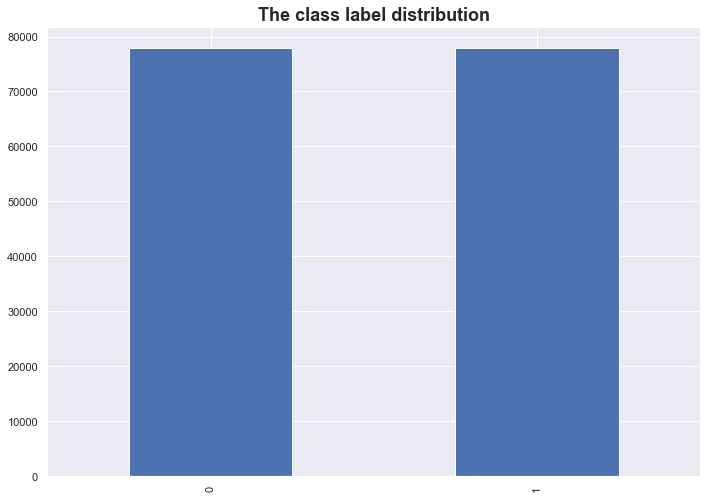

In [54]:
#let us check the class distribution after our modification  
s = pd.Series(bal_y)
s.value_counts()[:].plot(kind="bar")
plt.title("The class label distribution",fontsize = 18, weight = 'bold')
plt.show()


### Trying our Decision Tree classifier after balancing the data

In [58]:
DT3 = DecisionTreeClassifier()
DT3.fit(bal_X, bal_y)
pred_DT = DT3.predict(X_test)

In [59]:
cm_DT_classifier = classification_matrix(pred_DT, y_test)

bal_results = pd.DataFrame(list(cm_DT_classifier))
bal_results = bal_results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
bal_results.columns = ['BAL-Decision Tree']
bal_results

,BAL-Decision Tree
Accuracy,0.999281
Precision,0.996961
Recall,0.999380
F1 Score,0.998169


### Comparing all the Decision Tree's previous results 

In [60]:
DT_results = pd.concat([bal_results,total_result['Decision Tree'],total_result['RED-Decision Tree']], axis=1)
DT_results

,BAL-Decision Tree,Decision Tree,RED-Decision Tree
Accuracy,0.999281,0.999626,0.999565
Precision,0.996961,0.999071,0.999122
Recall,0.999380,0.999019,0.998658
F1 Score,0.998169,0.999045,0.998890


Although undersampling method may not be the best solution to solve the class imbalance issue, it has proved its ability to enhance the model performance in terms of recall score. Therefore, we decided to choose the winner network traffic  classifier to be **Decision Tree model that trained on undersampled training data** and without removing features(without dimensionality reduction).


We would like to conclude our work in this project by make some **cross validation** steps so that we can ensure the stated results of the decision tree.

### Cross Validation

In [62]:
scores = cross_val_score(DT3, X, y, cv=10, scoring='recall')
print(scores)

[0.99979441 0.99979441 0.99331826 0.99917763 0.99773849 0.99928043
 0.9974301  0.99804667 0.99455125 0.99948597]


In [64]:
print("The final Recall score result for our Decision Tree network traffic classifier using 10-fold cross-validation is \n",scores.mean())

The final Recall score result for our Decision Tree network traffic classifier using 10-fold cross-validation is 
 0.9978617607307791
